# Introdução

Estou adotando como metodologia para o estudo de caso desta base de dados a metodologia do Crisp-DM. 




Estamos na etapa da Preparação dos Dados. 





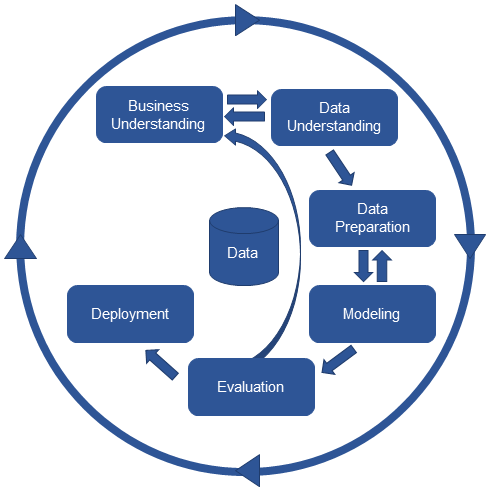

As tabelas estão relacionadas da seguinte forma: 














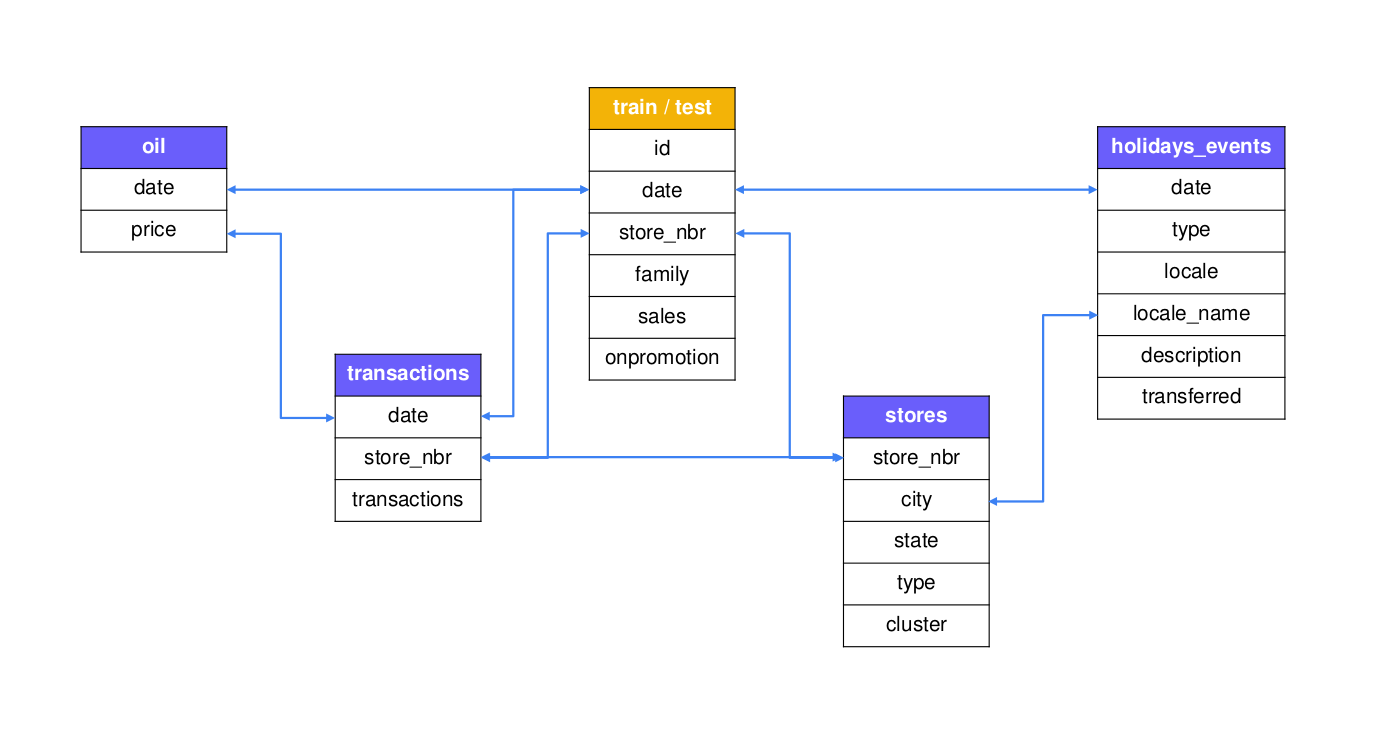

# Feature Engineering

In [1]:
# importacao das bibliotecas
import pandas as pd
import numpy as np

In [36]:
# importando dados
df_train = pd.read_csv("/home/isaacnilberto/Home/Isaac/POD/projetos/projeto_previsão_demandas/Previsao_de_demandas/Previsao_de_demandas/dados_projeto/train.csv")
df_test = pd.read_csv("/home/isaacnilberto/Home/Isaac/POD/projetos/projeto_previsão_demandas/Previsao_de_demandas/Previsao_de_demandas/dados_projeto/test.csv")
df_transactions = pd.read_csv("/home/isaacnilberto/Home/Isaac/POD/projetos/projeto_previsão_demandas/Previsao_de_demandas/Previsao_de_demandas/dados_projeto/transactions.csv")
df_stores = pd.read_csv("/home/isaacnilberto/Home/Isaac/POD/projetos/projeto_previsão_demandas/Previsao_de_demandas/Previsao_de_demandas/dados_projeto/stores.csv")
df_oil = pd.read_csv("/home/isaacnilberto/Home/Isaac/POD/projetos/projeto_previsão_demandas/Previsao_de_demandas/Previsao_de_demandas/dados_projeto/oil.csv")
df_holliday = pd.read_csv("/home/isaacnilberto/Home/Isaac/POD/projetos/projeto_previsão_demandas/Previsao_de_demandas/Previsao_de_demandas/dados_projeto/holidays_events.csv")

Verificando os dados

In [45]:
df_model_train = df_train.copy()

In [4]:
df_transactions.head()

,date,store_nbr,transactions
0,2014-01-02,1,1875
1,2014-01-02,2,2122
2,2014-01-02,3,3350
3,2014-01-02,4,1661
4,2014-01-02,5,1807


In [5]:
df_stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [6]:
df_oil.head()

,date,price
0,2014-01-02,95.14
1,2014-01-03,93.66
2,2014-01-06,93.12
3,2014-01-07,93.31
4,2014-01-08,91.90


In [7]:
df_holliday.head()

,date,type,locale,locale_name,description,transferred
0,2012-07-03,Holiday,Local,Santo Domingo,Fundacion de Santo Domingo,False
1,2012-12-05,Additional,Local,Quito,Fundacion de Quito-1,False
2,2012-12-06,Holiday,Local,Quito,Fundacion de Quito,False
3,2013-07-03,Holiday,Local,Santo Domingo,Fundacion de Santo Domingo,False
4,2013-12-05,Additional,Local,Quito,Fundacion de Quito-1,False


### Joins

In [8]:
# trocando o nome das colunas
df_holliday = df_holliday.rename(columns={"type": "type_holliday"})
df_oil = df_oil.rename(columns={"price": "oil_price"})

In [9]:
df_oil

,date,oil_price
0,2014-01-02,95.14
1,2014-01-03,93.66
2,2014-01-06,93.12
3,2014-01-07,93.31
4,2014-01-08,91.90
...,...,...
951,2017-08-25,47.65
952,2017-08-28,46.40
953,2017-08-29,46.46
954,2017-08-30,45.96


In [10]:
df_train =  (
          df_train
          .pipe(lambda x: x.merge(df_holliday, on = "date", how = "left"))
          .pipe(lambda x: x.merge(df_oil, on = "date", how = "left"))
          .pipe(lambda x: x.merge(df_transactions, on = ["date", "store_nbr"]))
          .pipe(lambda x: x.merge(df_stores, on = "store_nbr", how = "left"))
          )

df_test =  (
          df_test
          .pipe(lambda x: x.merge(df_holliday, on = "date", how = "left"))
          .pipe(lambda x: x.merge(df_oil, on = "date", how = "left"))
          .pipe(lambda x: x.merge(df_transactions, on = ["date", "store_nbr"]))
          .pipe(lambda x: x.merge(df_stores, on = "store_nbr", how = "left"))
          )

In [11]:
df_train.head()

,id,date,store_nbr,family,sales,onpromotion,type_holliday,locale,locale_name,description,transferred,oil_price,transactions,city,state,type,cluster
0,650430,2014-01-02,1,AUTOMOTIVE,3.0,0,NaN,NaN,NaN,NaN,NaN,95.14,1875,Quito,Pichincha,D,13
1,650431,2014-01-02,1,BABY CARE,0.0,0,NaN,NaN,NaN,NaN,NaN,95.14,1875,Quito,Pichincha,D,13
2,650432,2014-01-02,1,BEAUTY,6.0,0,NaN,NaN,NaN,NaN,NaN,95.14,1875,Quito,Pichincha,D,13
3,650433,2014-01-02,1,BEVERAGES,2524.0,0,NaN,NaN,NaN,NaN,NaN,95.14,1875,Quito,Pichincha,D,13
4,650434,2014-01-02,1,BOOKS,0.0,0,NaN,NaN,NaN,NaN,NaN,95.14,1875,Quito,Pichincha,D,13


In [12]:
df_test.head()

,id,date,store_nbr,family,sales,onpromotion,type_holliday,locale,locale_name,description,transferred,oil_price,transactions,city,state,type,cluster
0,2867238,2017-06-02,1,AUTOMOTIVE,19.0,0,NaN,NaN,NaN,NaN,NaN,47.68,1925,Quito,Pichincha,D,13
1,2867239,2017-06-02,1,BABY CARE,0.0,0,NaN,NaN,NaN,NaN,NaN,47.68,1925,Quito,Pichincha,D,13
2,2867240,2017-06-02,1,BEAUTY,1.0,0,NaN,NaN,NaN,NaN,NaN,47.68,1925,Quito,Pichincha,D,13
3,2867241,2017-06-02,1,BEVERAGES,2752.0,27,NaN,NaN,NaN,NaN,NaN,47.68,1925,Quito,Pichincha,D,13
4,2867242,2017-06-02,1,BOOKS,0.0,0,NaN,NaN,NaN,NaN,NaN,47.68,1925,Quito,Pichincha,D,13


## Construção de variáveis

### Construção de variáveis de lag e media móvel

In [13]:
# criando uma lista
list_lag = [1, 3, 5, 7, 14, 18, 21, 24, 27, 30, 45, 60, 90, 120, 150, 180, 360]

mean_lag = [1, 3, 5, 7, 14, 18, 21, 24, 27, 30, 45, 60, 90, 120, 150, 180, 360]


In [14]:
# criando uma funcao para gerar as lags para as lojas, familia de produtos pelo numero de vendas
def create_lag(df,agrupamento_1, agrupamento_2):
    list_lag
    for i in list_lag:
        df_train_full[f"sales_lag_{i}"] = df_train_full.groupby([agrupamento_1, agrupamento_2])["sales"].shift(i)
    return df


In [15]:
# criando uma funcao para gerar as lags para as lojas, familia de produtos pelo numero de vendas
def create_lag(df,agrupamento_1, agrupamento_2):
    list_lag
    for i in list_lag:
        df[f"sales_lag_{i}"] = df.groupby([agrupamento_1, agrupamento_2])["sales"].shift(i)
    return df

In [16]:
# criando uma funcao para gerar media movel para as lojas, familia de produtos pelo numero de vendas
def media_movel(df,agrupamento_1, agrupamento_2):
    mean_lag
    for i in mean_lag:
        df[f"rolling_mean_{i}"] = df.groupby([agrupamento_1, agrupamento_2])["sales"].transform(lambda x: x.rolling(window = i).mean())
    return df

In [17]:
df_train_full = create_lag(df_train, "store_nbr", "family")
df_train_full = media_movel(df_train, "store_nbr", "family")

In [18]:
df_test_full = create_lag(df_test, "store_nbr", "family")
df_test_full = media_movel(df_test, "store_nbr", "family")

In [19]:
df_test.head()

,id,date,store_nbr,family,sales,onpromotion,type_holliday,locale,locale_name,description,...,rolling_mean_24,rolling_mean_27,rolling_mean_30,rolling_mean_45,rolling_mean_60,rolling_mean_90,rolling_mean_120,rolling_mean_150,rolling_mean_180,rolling_mean_360
0,2867238,2017-06-02,1,AUTOMOTIVE,19.0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2867239,2017-06-02,1,BABY CARE,0.0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2867240,2017-06-02,1,BEAUTY,1.0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2867241,2017-06-02,1,BEVERAGES,2752.0,27,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2867242,2017-06-02,1,BOOKS,0.0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df_test.head()

,id,date,store_nbr,family,sales,onpromotion,type_holliday,locale,locale_name,description,...,rolling_mean_24,rolling_mean_27,rolling_mean_30,rolling_mean_45,rolling_mean_60,rolling_mean_90,rolling_mean_120,rolling_mean_150,rolling_mean_180,rolling_mean_360
0,2867238,2017-06-02,1,AUTOMOTIVE,19.0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2867239,2017-06-02,1,BABY CARE,0.0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2867240,2017-06-02,1,BEAUTY,1.0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2867241,2017-06-02,1,BEVERAGES,2752.0,27,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2867242,2017-06-02,1,BOOKS,0.0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Criação de variáveis temporais

In [21]:
def date_features(df, coluna):
    df["date"] = pd.to_datetime(df["date"])
    df["year"] = df[coluna].dt.year
    df["month"] = df[coluna].dt.month
    df["day"] = df[coluna].dt.day
    df["day_of_week"] = df[coluna].dt.dayofweek
    df["is_weekend"] = df[coluna].dt.year >=5
    return df

In [22]:
df_train_full = date_features(df_train_full, "date")
df_test_full = date_features(df_test_full, "date")

### Criação variável de interação entre sales e oil_price

In [23]:
df_train_full["sales_interaction_oil_price_mult"] = df_train_full["sales"] * df_train_full["oil_price"]
df_train_full["sales_interaction_oil_price_div"] = df_train_full["sales"] / df_train_full["oil_price"]

df_test_full["sales_interaction_oil_price_mult"] = df_test_full["sales"] * df_test_full["oil_price"]
df_test_full["sales_interaction_oil_price_div"] = df_test_full["sales"] / df_test_full["oil_price"]

### Criação do target

In [24]:
# ordenando a tabela pelo store_nbr, family e data
df_train_full = df_train_full.sort_values(by = ["store_nbr", "family", "date"])
df_train_full.head()

,id,date,store_nbr,family,sales,onpromotion,type_holliday,locale,locale_name,description,...,rolling_mean_150,rolling_mean_180,rolling_mean_360,year,month,day,day_of_week,is_weekend,sales_interaction_oil_price_mult,sales_interaction_oil_price_div
0,650430,2014-01-02,1,AUTOMOTIVE,3.0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2014,1,2,3,True,285.42,0.031532
165,652212,2014-01-03,1,AUTOMOTIVE,0.0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2014,1,3,4,True,0.00,0.000000
330,653994,2014-01-04,1,AUTOMOTIVE,0.0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2014,1,4,5,True,NaN,NaN
495,655776,2014-01-05,1,AUTOMOTIVE,1.0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2014,1,5,6,True,NaN,NaN
660,657558,2014-01-06,1,AUTOMOTIVE,6.0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2014,1,6,0,True,558.72,0.064433


In [25]:
# construindo target
# iremos fAazer uma janela deslizante, onde o dia de hoje esta incluido
df_train_full.loc[:,"next_15_days_include0"] = df_train_full.groupby(["family","store_nbr"])["sales"] \
                                                        .transform(lambda x: x.rolling(window = 15, min_periods = 15).sum().shift(-14))
df_train_full.head()

,id,date,store_nbr,family,sales,onpromotion,type_holliday,locale,locale_name,description,...,rolling_mean_180,rolling_mean_360,year,month,day,day_of_week,is_weekend,sales_interaction_oil_price_mult,sales_interaction_oil_price_div,next_15_days_include0
0,650430,2014-01-02,1,AUTOMOTIVE,3.0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,2014,1,2,3,True,285.42,0.031532,32.0
165,652212,2014-01-03,1,AUTOMOTIVE,0.0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,2014,1,3,4,True,0.00,0.000000,31.0
330,653994,2014-01-04,1,AUTOMOTIVE,0.0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,2014,1,4,5,True,NaN,NaN,35.0
495,655776,2014-01-05,1,AUTOMOTIVE,1.0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,2014,1,5,6,True,NaN,NaN,35.0
660,657558,2014-01-06,1,AUTOMOTIVE,6.0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,2014,1,6,0,True,558.72,0.064433,36.0


In [26]:
# criando o target
# para isso excluindo o dia de hoje
df_train_full["target"] = df_train_full["next_15_days_include0"] - df_train_full["sales"]
df_train_full = df_train_full.drop(columns = "next_15_days_include0")
df_train_full.head()

,id,date,store_nbr,family,sales,onpromotion,type_holliday,locale,locale_name,description,...,rolling_mean_180,rolling_mean_360,year,month,day,day_of_week,is_weekend,sales_interaction_oil_price_mult,sales_interaction_oil_price_div,target
0,650430,2014-01-02,1,AUTOMOTIVE,3.0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,2014,1,2,3,True,285.42,0.031532,29.0
165,652212,2014-01-03,1,AUTOMOTIVE,0.0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,2014,1,3,4,True,0.00,0.000000,31.0
330,653994,2014-01-04,1,AUTOMOTIVE,0.0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,2014,1,4,5,True,NaN,NaN,35.0
495,655776,2014-01-05,1,AUTOMOTIVE,1.0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,2014,1,5,6,True,NaN,NaN,34.0
660,657558,2014-01-06,1,AUTOMOTIVE,6.0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,2014,1,6,0,True,558.72,0.064433,30.0


In [39]:
# eliminando dados que contenham na
df_train_full = df_train_full.dropna(subset = "target")

In [27]:
# verificando as bases antes de salvar
df_train_full.head()

,id,date,store_nbr,family,sales,onpromotion,type_holliday,locale,locale_name,description,...,rolling_mean_180,rolling_mean_360,year,month,day,day_of_week,is_weekend,sales_interaction_oil_price_mult,sales_interaction_oil_price_div,target
0,650430,2014-01-02,1,AUTOMOTIVE,3.0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,2014,1,2,3,True,285.42,0.031532,29.0
165,652212,2014-01-03,1,AUTOMOTIVE,0.0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,2014,1,3,4,True,0.00,0.000000,31.0
330,653994,2014-01-04,1,AUTOMOTIVE,0.0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,2014,1,4,5,True,NaN,NaN,35.0
495,655776,2014-01-05,1,AUTOMOTIVE,1.0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,2014,1,5,6,True,NaN,NaN,34.0
660,657558,2014-01-06,1,AUTOMOTIVE,6.0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,2014,1,6,0,True,558.72,0.064433,30.0


In [28]:
df_test_full.head()

,id,date,store_nbr,family,sales,onpromotion,type_holliday,locale,locale_name,description,...,rolling_mean_150,rolling_mean_180,rolling_mean_360,year,month,day,day_of_week,is_weekend,sales_interaction_oil_price_mult,sales_interaction_oil_price_div
0,2867238,2017-06-02,1,AUTOMOTIVE,19.0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2017,6,2,4,True,905.92,0.398490
1,2867239,2017-06-02,1,BABY CARE,0.0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2017,6,2,4,True,0.00,0.000000
2,2867240,2017-06-02,1,BEAUTY,1.0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2017,6,2,4,True,47.68,0.020973
3,2867241,2017-06-02,1,BEVERAGES,2752.0,27,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2017,6,2,4,True,131215.36,57.718121
4,2867242,2017-06-02,1,BOOKS,0.0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2017,6,2,4,True,0.00,0.000000


In [29]:
df_model_train.head()

,id,date,store_nbr,family,sales,onpromotion
0,650430,2014-01-02,1,AUTOMOTIVE,3.0,0
1,650431,2014-01-02,1,BABY CARE,0.0,0
2,650432,2014-01-02,1,BEAUTY,6.0,0
3,650433,2014-01-02,1,BEVERAGES,2524.0,0
4,650434,2014-01-02,1,BOOKS,0.0,0


In [46]:
df_model_train.head()

,id,date,store_nbr,family,sales,onpromotion
0,650430,2014-01-02,1,AUTOMOTIVE,3.0,0
1,650431,2014-01-02,1,BABY CARE,0.0,0
2,650432,2014-01-02,1,BEAUTY,6.0,0
3,650433,2014-01-02,1,BEVERAGES,2524.0,0
4,650434,2014-01-02,1,BOOKS,0.0,0


In [48]:
# salvando os dados
df_model_train.to_csv("/home/isaacnilberto/Home/Isaac/POD/projetos/projeto_previsão_demandas/Previsao_de_demandas/Previsao_de_demandas/dados_projeto/df_model_train.csv")
df_test_full.to_csv("/home/isaacnilberto/Home/Isaac/POD/projetos/projeto_previsão_demandas/Previsao_de_demandas/Previsao_de_demandas/dados_projeto/df_test_full.csv")
df_train_full.to_csv("/home/isaacnilberto/Home/Isaac/POD/projetos/projeto_previsão_demandas/Previsao_de_demandas/Previsao_de_demandas/dados_projeto/df_train_full.csv")